# Dependencies

In [159]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting Rental Listing Data

In [54]:
RENTAL_URL = 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list'
RENTAL_URL_LIST = ['https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list']
for i in range(2, 51):
    RENTAL_URL_LIST.append(f'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep={i}')
RENTAL_URL_LIST

['https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep=2',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep=3',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep=4',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep=5',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep=6',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep=7',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep=8',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep=9',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep=10',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep=11',
 'https://www.homegate.ch/rent/real-estate/country-switzerland/matching-list?ep

In [50]:
with open('rentals.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Link', 'Price', 'Address', 'Number of Rooms', 'Living Space Area', 'Highlighted Description', 'Description'])
    for url in RENTAL_URL_LIST:
        try:
            response = requests.get(url)

            if response.status_code == 200:
                # Parse the HTML content of the page
                soup = BeautifulSoup(response.content, 'html.parser')
                
                # Find elements containing the desired data
                listings = soup.find_all('div', class_='ResultList_listItem_j5Td_')

                for i, listing in enumerate(listings):
                    # Extracting the number of rooms, address, living space area, highlighted description, and full description
                    link = listing.find('a', class_='HgCardElevated_content_uir_2 HgCardElevated_link_EHfr7')['href']
                    price = listing.find(['div', 'span'], class_=['HgListingCard_mainTitle_x0p2D', 'HgListingCard_price_JoPAs']).text.strip('Premium')
                    number_of_rooms = listing.find(['div', 'span', 'strong'], class_='HgListingRoomsLivingSpace_roomsLivingSpace_GyVgq').text 
                    address = listing.find(['div', 'address'], class_='HgListingCard_address_JGiFv').text 
                    living_space_area = listing.find(['div', 'span', 'strong'], class_='HgListingRoomsLivingSpace_roomsLivingSpace_GyVgq').text 
                    highlighted_description = listing.find(['p', 'span'], class_='HgListingDescription_title_NAAxy').text
                    description = listing.find(['div', 'p'], class_=['HgListingDescription_description_r5HCO HgListingCard_description_kmLhw', 'HgListingDescription_large_uKs3J']).text 

                    # Process or write the data on a csv file
                    writer.writerow([link, price, address, number_of_rooms, living_space_area, highlighted_description, description])

        except Exception as e:
            print('Error:', e)
            continue

print('Data extraction complete. Check listings.csv for the output.')


Data extraction complete. Check listings.csv for the output.


# Extracting Rental Listing Data

In [51]:
BUY_URL = 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list'

In [52]:
BUY_URL_LIST = ['https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list']
for i in range(2, 51):
    BUY_URL_LIST.append(f'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep={i}')

BUY_URL_LIST

['https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=2',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=3',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=4',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=5',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=6',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=7',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=8',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=9',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=10',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=11',
 'https://www.homegate.ch/buy/real-estate/country-switzerland/matching-list?ep=12',
 'http

In [222]:
with open('buys.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Link', 'Price', 'Address', 'Number of Rooms', 'Living Space Area', 'Highlighted Description', 'Description'])
    for url in BUY_URL_LIST:
        try:
            response = requests.get(url)

            if response.status_code == 200:
                # Parse the HTML content of the page
                soup = BeautifulSoup(response.content, 'html.parser')
                
                # Find elements containing the desired data
                listings = soup.find_all('div', class_='ResultList_listItem_j5Td_')

                for i, listing in enumerate(listings):
                    # Extracting the number of rooms, address, living space area, highlighted description, and full description
                    link = listing.find('a', class_='HgCardElevated_content_uir_2 HgCardElevated_link_EHfr7')['href']
                    price = listing.find(['div', 'span'], class_=['HgListingCard_mainTitle_x0p2D', 'HgListingCard_price_JoPAs']).text.strip('Premium')
                    number_of_rooms = listing.find(['div', 'span', 'strong'], class_='HgListingRoomsLivingSpace_roomsLivingSpace_GyVgq').text 
                    address = listing.find(['div', 'address'], class_='HgListingCard_address_JGiFv').text 
                    living_space_area = listing.find(['div', 'span', 'strong'], class_='HgListingRoomsLivingSpace_roomsLivingSpace_GyVgq').text 
                    highlighted_description = listing.find(['p', 'span'], class_='HgListingDescription_title_NAAxy').text
                    description = listing.find(['div', 'p'], class_=['HgListingDescription_description_r5HCO HgListingCard_description_kmLhw', 'HgListingDescription_large_uKs3J']).text 

                    # Process or write the data on a csv file
                    writer.writerow([link, price, address, number_of_rooms, living_space_area, highlighted_description, description])

        except Exception as e:
            print('Error:', e)
            continue

print('Data extraction complete. Check listings.csv for the output.')


Data extraction complete. Check listings.csv for the output.


# Exploratory Data Analysis

## Data

In [241]:
rental_df = pd.read_csv('rentals.csv')
rental_df.head()

,Link,Price,Address,Number of Rooms,Living Space Area,Highlighted Description,Description
0,/rent/4000659202,"CHF 2,610.– / month","Vogesenstrasse 45, 4056 Basel",2 rooms 55m² living space,2 rooms 55m² living space,Neu renovierte Wohnung in Baumgartnerhaus,Neu renovierte Wohnung in Baumgartnerhaus Erst...
1,/rent/4000636078,"CHF 1,700.– / month","Alte Aarburgerstrasse 19, 4852 Rothrist",2 rooms,2 rooms,Wohnung möbliert von April bis Ende Juni 20 24,Wohnung möbliert von April bis Ende Juni 20 2...
2,/rent/4000545552,"CHF 2,110.– / month","Lätternweg 36, 3052 Zollikofen",2.5 rooms,2.5 rooms,Exklusive Neubauwohnung im Herzen von Zollikofen,Exklusive Neubauwohnung im Herzen von Zollikof...
3,/rent/4000567575,"CHF 1,810.– / month","Bourg du Village 9, 1512 Chavannes-sur-Moudon",2.5 rooms 39m² living space,2.5 rooms 39m² living space,Construction neuve,Construction neuve Dans un petit immeuble d'ha...
4,/rent/4000339166,"CHF 5,100.– / month","Hauptstrasse 26, 4853 Murgenthal",4.5 rooms 200m² living space,4.5 rooms 200m² living space,Traumhaftes 4.5-Zimmer-Einfamilienhaus auf 457...,Traumhaftes 4.5-Zimmer-Einfamilienhaus auf 457...


## Data Cleaning

In [242]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Link                     1000 non-null   object
 1   Price                    1000 non-null   object
 2   Address                  1000 non-null   object
 3   Number of Rooms          1000 non-null   object
 4   Living Space Area        1000 non-null   object
 5   Highlighted Description  1000 non-null   object
 6   Description              1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [243]:
def clean_data(rental_df):
    rental_df['Link'] = rental_df['Link'].apply(lambda x: 'https://www.homegate.ch' + x)
    rental_df['id'] = rental_df['Link'].apply(lambda x: x.split('/')[-1]).astype('int64')
    rental_df.set_index('id', inplace=True)
    rental_df['status'] = rental_df['Link'].apply(lambda x: 'rent' if 'rent' in x else ('buy' if 'buy' in x else 'unknown')).astype('str')
    rental_df['Currency'] = rental_df['Price'].apply(lambda x: x.split(' ')[1]).astype('str')
    rental_df['Cost'] = rental_df['Price'].apply(lambda x: x.split(' ')[2][:-2]).str.replace(',', '').replace('', float('nan'))
    rental_df['Cost'].fillna(0, inplace=True)
    rental_df['Cost'] = rental_df['Cost'].astype('float')
    rental_df['Per'] = rental_df['Price'].apply(lambda x: x.split(' ')[4] if len(x.split(' ')) > 4 else None).astype('str')
    rental_df.drop(columns=['Price'], inplace=True)

    # Extracting numeric values for 'Number of Rooms'
    rental_df['Number of Rooms'] = rental_df['Number of Rooms'].str.extract('(\d+\.?\d*)')[0].astype('float')

    # Cleaning and extracting numeric values for 'Living Space Area'
    rental_df['Living Space Area'] = rental_df['Living Space Area'].str.replace('m²', '')
    rental_df['Living Space Area'] = rental_df['Living Space Area'].str.extract(r'(\d+\.?\d*)\s*(?=living space|$)')[0].astype('float')

    return rental_df

In [244]:
clean_rental = clean_data(rental_df)
clean_rental

,Link,Address,Number of Rooms,Living Space Area,Highlighted Description,Description,status,Currency,Cost,Per
id,,,,,,,,,,
4000659202,https://www.homegate.ch/rent/4000659202,"Vogesenstrasse 45, 4056 Basel",2.0,55.0,Neu renovierte Wohnung in Baumgartnerhaus,Neu renovierte Wohnung in Baumgartnerhaus Erst...,rent,CHF,2610.0,month
4000636078,https://www.homegate.ch/rent/4000636078,"Alte Aarburgerstrasse 19, 4852 Rothrist",2.0,NaN,Wohnung möbliert von April bis Ende Juni 20 24,Wohnung möbliert von April bis Ende Juni 20 2...,rent,CHF,1700.0,month
4000545552,https://www.homegate.ch/rent/4000545552,"Lätternweg 36, 3052 Zollikofen",2.5,NaN,Exklusive Neubauwohnung im Herzen von Zollikofen,Exklusive Neubauwohnung im Herzen von Zollikof...,rent,CHF,2110.0,month
4000567575,https://www.homegate.ch/rent/4000567575,"Bourg du Village 9, 1512 Chavannes-sur-Moudon",2.5,39.0,Construction neuve,Construction neuve Dans un petit immeuble d'ha...,rent,CHF,1810.0,month
4000339166,https://www.homegate.ch/rent/4000339166,"Hauptstrasse 26, 4853 Murgenthal",4.5,200.0,Traumhaftes 4.5-Zimmer-Einfamilienhaus auf 457...,Traumhaftes 4.5-Zimmer-Einfamilienhaus auf 457...,rent,CHF,5100.0,month
...,...,...,...,...,...,...,...,...,...,...
4000481275,https://www.homegate.ch/rent/4000481275,"Au 10, 5420 Ehrendingen",2.5,64.0,Schöne 2.5-Zimmerwohnung im Hochparterre,Schöne 2.5-Zimmerwohnung im Hochparterre Wir v...,rent,CHF,2120.0,monthTop
4000480363,https://www.homegate.ch/rent/4000480363,"Im Lohgraben 60, 4104 Oberwil",2.5,59.0,Schöne Wohnung am Waldrand zum Bruderholz,Schöne Wohnung am Waldrand zum Bruderholz Am W...,rent,CHF,2460.0,monthTop
4000478289,https://www.homegate.ch/rent/4000478289,"Zürichstrasse 1, 8117 Fällanden",2.0,NaN,Schöne 2 Zimmer-Wohnung direkt im Herzen von ...,Schöne 2 Zimmer-Wohnung direkt im Herzen von ...,rent,CHF,2330.0,monthTop


In [233]:
clean_rental.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 4000659202 to 4000477643
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Link                     1000 non-null   object
 1   Address                  1000 non-null   object
 2   Number of Rooms          1000 non-null   object
 3   Living Space Area        909 non-null    object
 4   Highlighted Description  1000 non-null   object
 5   Description              1000 non-null   object
 6   status                   1000 non-null   object
 7   Currency                 1000 non-null   object
 8   Cost                     1000 non-null   object
 9   Per                      999 non-null    object
dtypes: object(10)
memory usage: 85.9+ KB


## Data Visualisation

In [245]:
# Plotting Average Price accordinf to Rooms
scatter_data = clean_rental.groupby('Number of Rooms')['Cost'].mean().reset_index()
scatter_data


,Number of Rooms,Cost
0,1.0,1408.695652
1,1.5,1881.578947
2,2.0,2080.344828
3,2.5,2796.528497
4,3.0,3366.607143
5,3.5,3748.637771
6,4.0,7368.750000
7,4.5,5790.000000
8,5.0,6744.444444
9,5.5,8161.250000


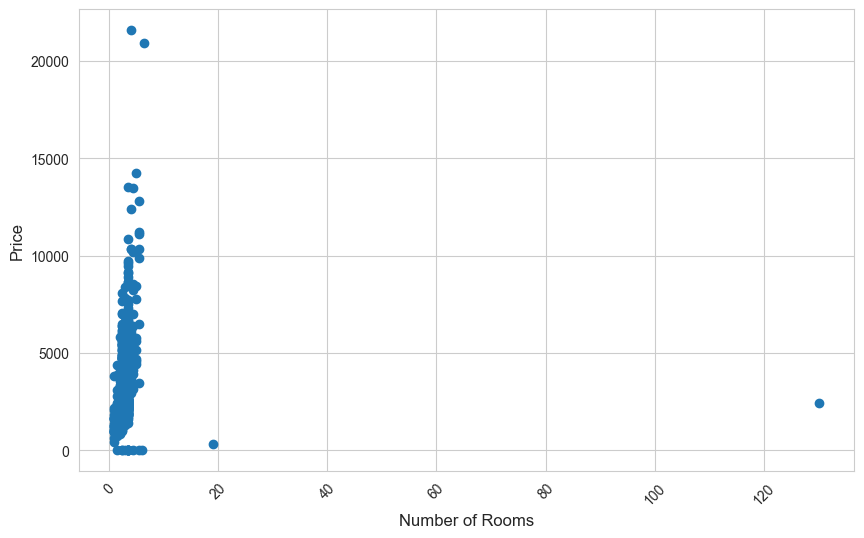

In [246]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_rental['Number of Rooms'], clean_rental['Cost'])
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [250]:
data_living = clean_rental.groupby('Living Space Area')['Cost'].mean().reset_index()
data_living

,Living Space Area,Cost
0,15.0,1210.0
1,17.0,1630.0
2,18.0,2070.0
3,19.0,1045.0
4,20.0,2430.0
...,...,...
79,390.0,8250.0
80,400.0,10790.0
81,410.0,14250.0
82,450.0,9870.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


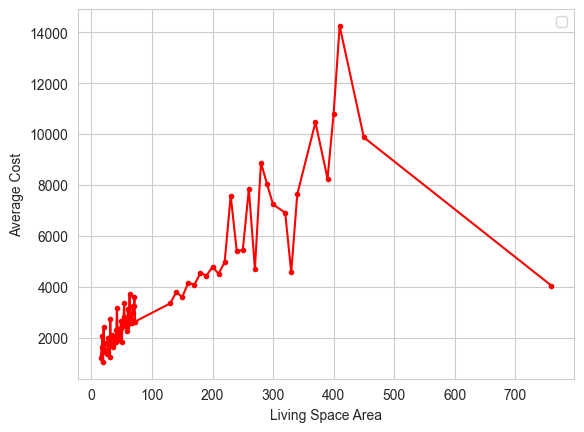

In [264]:
plt.plot(data_living['Living Space Area'], data_living['Cost'], marker='o', ms=3, color='r')
plt.xlabel('Living Space Area')
plt.ylabel('Average Cost')
plt.legend()
plt.show()

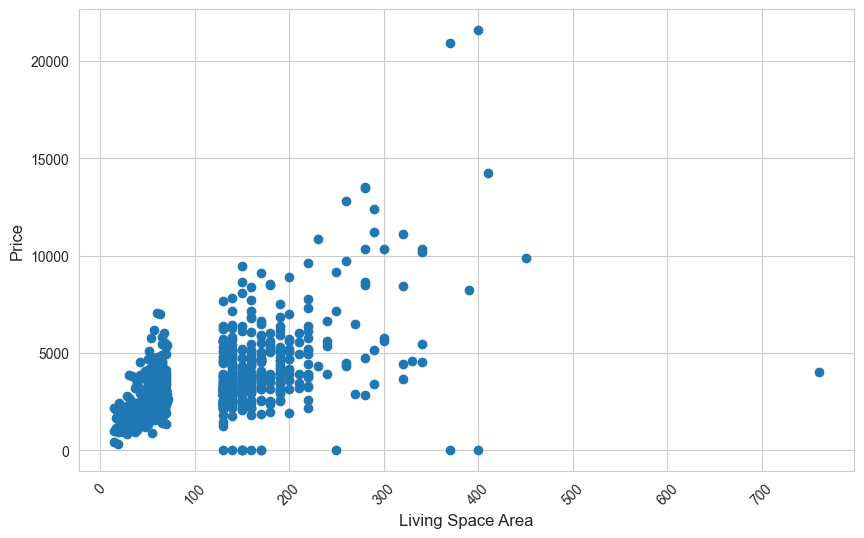

In [249]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_rental['Living Space Area'], clean_rental['Cost'])
plt.xlabel('Living Space Area', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()